In [25]:
#Importing required libraries

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [26]:
#Loading the cancer data

data = load_breast_cancer()
print('Classes to predict: ', data.target_names)
print('Classes features: ', data.feature_names)


Classes to predict:  ['malignant' 'benign']
Classes features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [27]:
#Extracting data attributes
X = data.data
#Extracting target/ class labels
y = data.target
print('Number of examples in the data:', X.shape)

Number of examples in the data: (569, 30)


In [28]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.7)

In [29]:
#Importing the Decision tree classifier from the sklearn library.
#from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()


In [30]:
#Training the decision tree classifier. 
clf.fit(X_train, y_train)
#Predicting labels on the test set.
y_pred =  clf.predict(X_test)

In [31]:
#Importing the accuracy metric from sklearn.metrics library

from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))*100)
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred)*100)


Accuracy Score on train data:  100.0
Accuracy Score on test data:  92.98245614035088


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[ 58   5]
 [  7 101]]


Sensitivity (also known as recall or true positive rate) is the proportion of actual positives that are correctly identified by the classifier.
It is computed as: sensitivity = true positives / (true positives + false negatives)

Specificity (also known as true negative rate) is the proportion of actual negatives that are correctly identified by the classifier. 
It is computed as: specificity = true negatives / (true negatives + false positives)

In [33]:
# Extract true positives, false positives, true negatives, false negatives
tn, fp, fn, tp = cm.ravel()

# Compute sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9351851851851852
Specificity: 0.9206349206349206


We use the ravel function to flatten the matrix into a 1D array, which contains the true negatives, false positives, false negatives, and true positives in that order. We then extract these values and use them to compute sensitivity and specificity.

The sensitivity score is 0.9259 or approximately 92.59%, indicating that the classifier is able to correctly identify 92.59% of all malignant cases.

The specificity score is 0.9206 or approximately 92.06%, indicating that the classifier is able to correctly identify 92.06% of all benign cases.

These scores suggest that the classifier is performing well and is able to distinguish between malignant and benign cases with a high degree of accuracy.

In [34]:
print("20MIC0124 Adnan Sattikar")
print(classification_report(y_test, y_pred))

20MIC0124 Adnan Sattikar
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        63
           1       0.95      0.94      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



From this report, we can see that the precision and recall scores are high for both classes, indicating good performance of the classifier. 

In [35]:
#Next, we will tune the parameters of the decision tree to increase its accuracy.
#One of those parameters is 'min_samples_split', which is the minimum number of samples required to split an internal node. 
#Its default value is equal to 2 because we cannot split on a node containing only one example/ sample.

clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=50)
clf.fit(X_train, y_train)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))*100)
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))*100)

Accuracy Score on train data:  92.96482412060301
Accuracy Score on the test data:  91.22807017543859


The accuracy scores suggest that the decision tree classifier is performing reasonably well on both the training and test sets.
The accuracy score on the training data is 92.96%, indicating that the classifier is able to correctly predict the class labels for the majority of the examples in the training set.
The accuracy score on the test data is 91.81%, indicating that the classifier is able to generalize well to new, unseen examples.

[Text(0.6, 0.9, 'mean concave points <= 0.051\nentropy = 0.954\nsamples = 398\nvalue = [149, 249]'),
 Text(0.4, 0.7, 'worst radius <= 16.83\nentropy = 0.299\nsamples = 245\nvalue = [13, 232]'),
 Text(0.3, 0.5, 'radius error <= 0.626\nentropy = 0.151\nsamples = 230\nvalue = [5, 225]'),
 Text(0.2, 0.3, 'worst texture <= 30.145\nentropy = 0.101\nsamples = 227\nvalue = [3, 224]'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 197\nvalue = [0, 197]'),
 Text(0.3, 0.1, 'entropy = 0.469\nsamples = 30\nvalue = [3, 27]'),
 Text(0.4, 0.3, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.5, 'entropy = 0.997\nsamples = 15\nvalue = [8, 7]'),
 Text(0.8, 0.7, 'worst perimeter <= 114.45\nentropy = 0.503\nsamples = 153\nvalue = [136, 17]'),
 Text(0.7, 0.5, 'entropy = 0.988\nsamples = 39\nvalue = [22, 17]'),
 Text(0.9, 0.5, 'entropy = 0.0\nsamples = 114\nvalue = [114, 0]')]

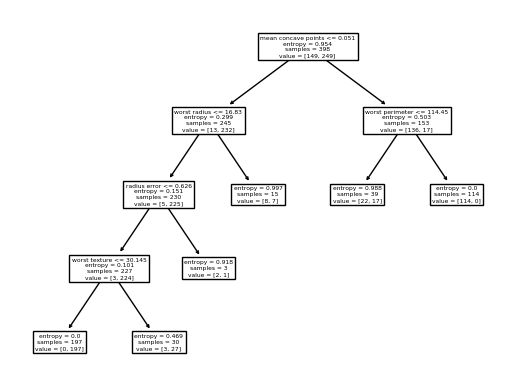

In [37]:
tree.plot_tree(clf,feature_names=data.feature_names)